<img style="float: left; margin: 30px 15px 15px 15px;" src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Julia María Domínguez Russell y Mariana Valenzuela Lafarga.

**Fecha:** 30 de marzo del 2021.

**Expediente** : 749767 & 749770.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/JuliaDomRuss/Proyecto_Simulacion

# Proyecto TEMA-2

## Definición del proyecto

Para este proyecto se va a modelar un tipo de cambio, el cuál es el **dólar (USD/MXN)**.Para poder modelar obtuvimos los datos mensuales del tipo de cambio de la divisa mencionada desde el mes de abril del 2015 hasta el mes de marzo del 2023. Para poder realizar la simulación se utilizarán 4 diferentes nodos los cuáles son el diferencial de inflación, diferencial de crecimiento económico, información histórica del mismo tipo de cambio y tasas de interés entre ambos países.

A continuación, se muestra el diagrama para realizar nuestro modelo donde se identifican los “nodos” o “escenarios” a simular.

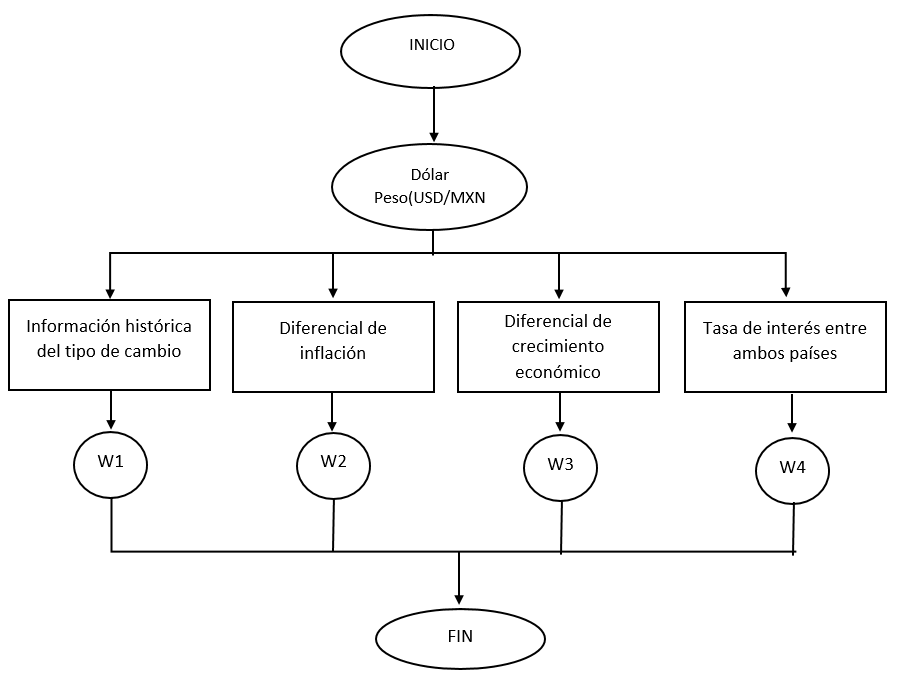

Las variables que tomamos en cuenta en este proyecto son los que creemos que pueden tener un impacto y a su vez guardan una relación con el tipo de cambio. 

Los nodos que tomamos en cuenta en este proyecto son los que creemos que pueden tener un impacto y a su vez guardan una relación con el tipo de cambio. 
- La información histórica del mismo tipo de cambio este es un determinante  importante para el tipo de cambio. Es decir, el valor de la moneda local futura, depende de su valor anterior o sus valores históricos. Haciendolo así un modelo con una parte autoregresiva.
- El diferencial de inflación se refiere a la diferencia que existe entre la tasa de inflación de dos o más países, se va a utilizar como “nodo” ya que suele utilizarse como indicador de la posición competitiva y de la variación relativa de los tipos de cambio a largo plazo.
- El diferencial de crecimiento económico hace referencia a la diferencia que existe entre la tasa de crecimiento económico entre dos o más países, se va a utilizar como "nodo" ya que hay una relación en el largo plazo entre el aumento o dismunición del PIB con el tipo de cambio, por ejemplo un crecimiento del producto interno bruto aprecia la moneda de ese país, es decir, el incremento de la productividad de un país en relación con otros hace que su moneda se aprecie.
- La tasa de interés entre ambos países nos habla acerca de la tasa de interés interna que maneja cada país en el que se ve involucrado el tipo de cambio y hay una relación a corto plazo entre tipo de cambio y tasa de interés por ejemplo si la tasa de interés interna sube y se mantiene constante el tipo de cambio, el rendimiento de los activos locales se eleva en relación con los extranjeros por lo que los inversionistas los demandarán más, ocasionando que la moneda local se aprecie y vicervesa.

## Objetivos

### Objetivo general: 
- Obtener la probabilidad de que el dolar aumente.

### Objetivos específicos:
- Encontrar la distribución de probabilidad del tipo de cambio USD/MXN.
- Encontrar la distribución de probabilidad del diferencial de inflación.
- Encontrar la distribución de probabilidad del diferencial de crecimiento económico.
- Encontrar la distribución de probabilidad de la tasa de interés entre ambos países.
- Realizar una prueba de hipótesis de la independencia de los nodos.
- Encontrar los pesos de cada nodo para predecir el tipo de cambio USD/MXN.
- Encontrar la ecuación por la cual se rige el tipo de cambio USD/MXN.

## Hipótesis y supuestos

En nuestro modelo tenemos el siguiente supuesto:
- Asumimos que el tipo de cambio entre USD/MXN puede predecirse con estos nodos.

La hipótesis que queremos demostrar es la siguiente:
- Las variables utilizadas para predecir los nodos son independientes estadísticamente.

## Obtención de Base de Datos

**Datos históricos de la tasa de cambio**

La tasa de cambio USD/MXN se obtuvo con frecuencia mensual desde abril 2015 a marzo 2023. Los datos fueron recopilados de investing el 15 de abril del 2023 en https://mx.investing.com/currencies/usd-mxn.

**Diferencial de inflación**

Se utilizó la tasa de inflación interanual de México y Estados Unidos de América de frecuencia mensual desde abril 2015 a marzo 2023.Los datos fueron recopilados de Datos Macro de las siguientes ligas: https://datosmacro.expansion.com/ipc-paises/mexico?sector=IPC+General&sc=IPC-IG y https://datosmacro.expansion.com/ipc-paises/usa?sector=IPC+General&sc=IPC-IG.

## Visualización de resultados de simulación

## Código de la simulación

### Prueba de correlación

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from matplotlib import pyplot as plt

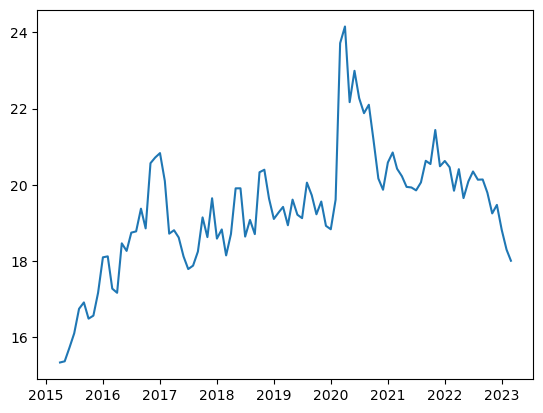

In [2]:
tc_dolar = pd.read_excel(
    "Tipo de cambio.xlsx",
    sheet_name="Hoja1",
    index_col=[0],
    usecols=[0, 1]
)
x= tc_dolar.values
x= x.ravel()
plt.plot(tc_dolar)

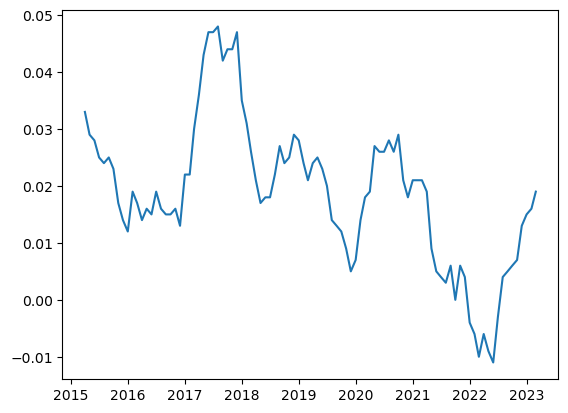

In [3]:
dif_inf = pd.read_excel(
    "Inflacion Mexico.xlsx",
    sheet_name="Hoja2",
    index_col=[0],
    usecols=[0, 1]
)
y= dif_inf.values
y= y.ravel()
plt.plot(dif_inf)

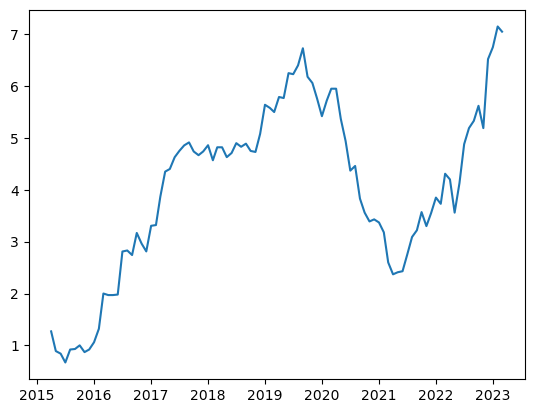

In [4]:
dif_tasaint = pd.read_excel(
    "tasadeinteresmex-usa.xlsx",
    sheet_name="DIFERENCIAL",
    index_col=[0],
    usecols=[0, 1]
)
z= dif_tasaint.values
z= z.ravel()
plt.plot(dif_tasaint)


(31,)

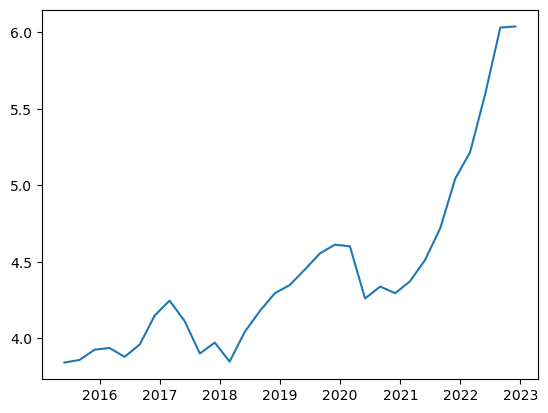

In [5]:
dif_crecimiento = pd.read_excel(
    "Diferencial crecimiento economico.xlsx",
    sheet_name="Hoja3",
    index_col=[0],
    usecols=[0, 1]
)
w= dif_crecimiento.values
w= w.ravel()
plt.plot(dif_crecimiento)
w.shape

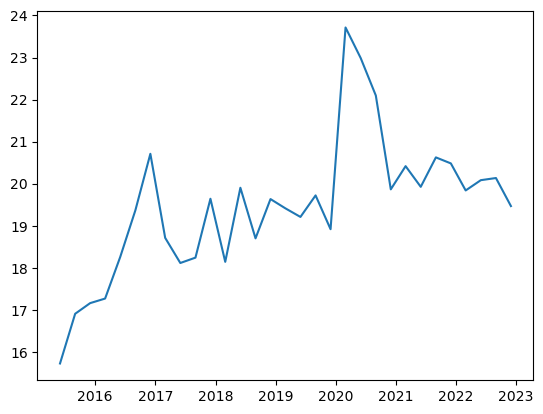

In [6]:
tc_dolar2 = pd.read_excel(
    "Tipo de cambio2.xlsx",
    sheet_name="Hoja3",
    index_col=[0],
    usecols=[0, 1]
)
x2= tc_dolar2.values
x2= x2.ravel()
plt.plot(tc_dolar2)

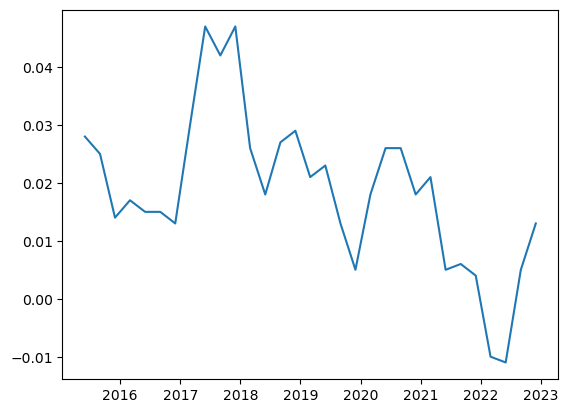

In [7]:
dif_inf2 = pd.read_excel(
    "Inflacion Mexico.xlsx",
    sheet_name="Hoja3",
    index_col=[0],
    usecols=[0, 1]
)
y2= dif_inf2.values
y2= y2.ravel()
plt.plot(dif_inf2)

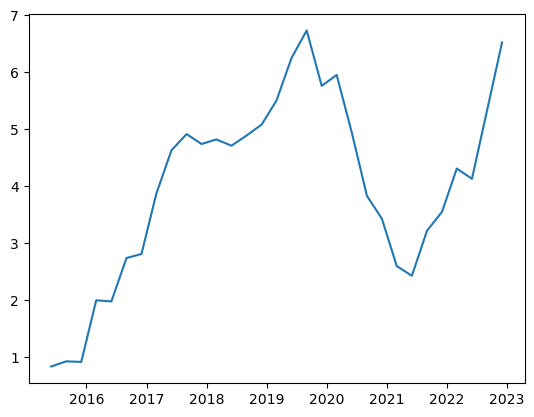

In [8]:
dif_tasaint2 = pd.read_excel(
    "tasadeinteresmex-usa.xlsx",
    sheet_name="Hoja1",
    index_col=[0],
    usecols=[0, 1]
)
z2= dif_tasaint2.values
z2= z2.ravel()
plt.plot(dif_tasaint2)

#### Correlación tipo de cambio con diferencial de inflación

In [9]:
pearsonr(x, y)

PearsonRResult(statistic=-0.2612941302689739, pvalue=0.010127347329697684)

#### Correlación tipo de cambio con tasa de interés

In [10]:
pearsonr(x, z)

PearsonRResult(statistic=0.41475671654475454, pvalue=2.652728364751724e-05)

#### Correlación tipo de cambio con diferencial de crecimiento económico

In [11]:
pearsonr(x2, w)

PearsonRResult(statistic=0.36893845987915785, pvalue=0.04110824932965446)

## Prueba de independencia

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: los nodos son estadísticamente independientes.

> $H_a$: los nodos no son estadísticamente independientes.

Se utilizará un valor de significancia del 5%.

In [12]:
from scipy.stats import chi2_contingency

**Entre información histórica del tipo de cambio y el diferencial de inflación**

In [13]:
tabla = pd.crosstab(x, y)

# Realizamos el test de chi-cuadrado
stat, p, dof, expected = chi2_contingency(tabla)

# Mostramos los resultados
print("Estadístico de chi-cuadrado: ", stat)
print("Valor p: ", p)
print("Grados de libertad: ", dof)

Estadístico de chi-cuadrado:  6240.000000000001
Valor p:  0.12024099077645083
Grados de libertad:  6110


**Entre información histórica del tipo de cambio y tasa de interés**

In [14]:
tabla = pd.crosstab(x, z)

# Realizamos el test de chi-cuadrado
stat, p, dof, expected = chi2_contingency(tabla)

# Mostramos los resultados
print("Estadístico de chi-cuadrado: ", stat)
print("Valor p: ", p)
print("Grados de libertad: ", dof)

Estadístico de chi-cuadrado:  8760.000000000004
Valor p:  0.19682035632843473
Grados de libertad:  8648


**Entre información histórica del tipo de cambio y el diferencial de crecimiento económico**

In [15]:
tabla = pd.crosstab(x2, w)

# Realizamos el test de chi-cuadrado
stat, p, dof, expected = chi2_contingency(tabla)

# Mostramos los resultados
print("Estadístico de chi-cuadrado: ", stat)
print("Valor p: ", p)
print("Grados de libertad: ", dof)

Estadístico de chi-cuadrado:  930.0
Valor p:  0.23728274448221548
Grados de libertad:  900


**Entre tasa de interés y el diferencial de inflación**

In [16]:
tabla = pd.crosstab(z, y)

# Realizamos el test de chi-cuadrado
stat, p, dof, expected = chi2_contingency(tabla)

# Mostramos los resultados
print("Estadístico de chi-cuadrado: ", stat)
print("Valor p: ", p)
print("Grados de libertad: ", dof)

Estadístico de chi-cuadrado:  6096.000000000001
Valor p:  0.14457141036469823
Grados de libertad:  5980


**Entre diferencial de crecimiento y tasa de interés**

In [17]:
tabla = pd.crosstab(w, z2)

# Realizamos el test de chi-cuadrado
stat, p, dof, expected = chi2_contingency(tabla)

# Mostramos los resultados
print("Estadístico de chi-cuadrado: ", stat)
print("Valor p: ", p)
print("Grados de libertad: ", dof)

Estadístico de chi-cuadrado:  930.0
Valor p:  0.23728274448221548
Grados de libertad:  900


**Entre diferencial de crecimiento y diferencial de inflación**

In [18]:
tabla = pd.crosstab(w, y2)

# Realizamos el test de chi-cuadrado
stat, p, dof, expected = chi2_contingency(tabla)

# Mostramos los resultados
print("Estadístico de chi-cuadrado: ", stat)
print("Valor p: ", p)
print("Grados de libertad: ", dof)

Estadístico de chi-cuadrado:  744.0
Valor p:  0.26008515593348736
Grados de libertad:  720


Al realizar las pruebas de independencia entre los 4 nodos obtuvimos que con nivel de confianza del 95% podemos decir que los nodos son estadísticamente independientes.

# Simulaciones de nodos

In [19]:
from sklearn.neighbors import KernelDensity
import seaborn as sns
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import random

def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)
    
    
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)


def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x2 = f(R1)
    t_x2 = t(R1)
    condition = R2*t_x2 <=f_x2
    [plt.plot(R1[i],R2[i]*t_x2[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x2[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    
    return x

def Acep_rechazo3(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    x = [R1[i] for i in range(len(R1)) if condition[i]]
                
    return x

def kde_statsmodels_m2(x, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return lambda x_i: kde.pdf(x_i)

def m_estratificado(a, b, B):
    Ui = np.random.uniform(a, b, B)
    Bi = np.arange(0, B)
    Ui_estra = (Ui + Bi) / B
    
    # Escalar a un rango entre a y b
    min_val = Ui_estra.min()
    max_val = Ui_estra.max()
    Ui_estra = ((Ui_estra - min_val) / (max_val - min_val)) * (b - a) + a
    
    return Ui_estra


kde_funcs = [kde_statsmodels_u, kde_statsmodels_m, kde_scipy, kde_sklearn]
kde_funcnames = ['Statsmodels-U', 'Statsmodels-M', 'Scipy', 'Scikit-learn']

print( "Package Versions:")
import sklearn; print( "  scikit-learn:", sklearn.__version__)
import scipy; print ("  scipy:", scipy.__version__)
import statsmodels; print( "  statsmodels:", statsmodels.__version__)

Package Versions:
  scikit-learn: 1.2.2
  scipy: 1.9.1
  statsmodels: 0.13.2


In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Nodo 1: Simulación de información histórica del tipo de cambio

## Kernel Density Estimation

In [21]:
x= tc_dolar.values
x= x.ravel()
# El grid que usaremos para graficar
x_grid = np.linspace(12.5, 26, 1000)


### Histograma

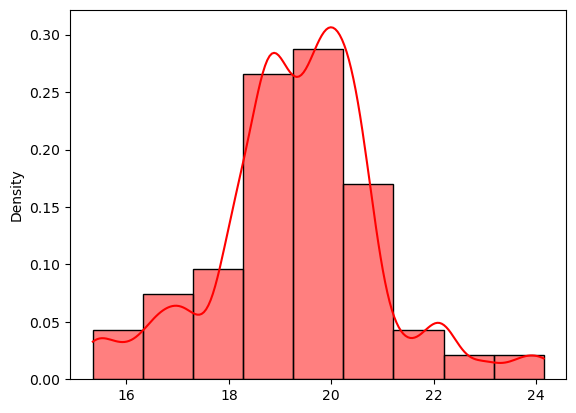

In [22]:
sns.histplot(data=x, stat='density', kde=True, kde_kws={'bw_method': .2}, color='r', bins=9);

<AxesSubplot:ylabel='Density'>

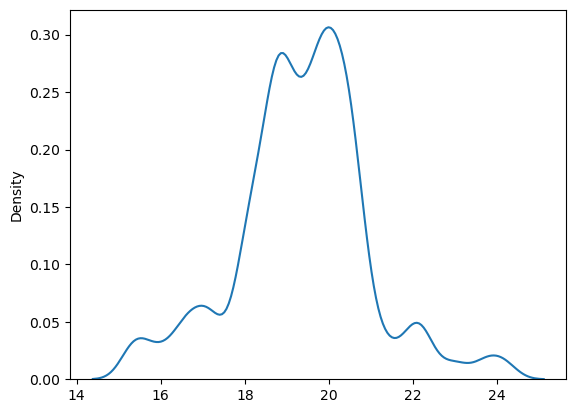

In [23]:
sns.kdeplot(data=x, bw_method=0.2)

### Selección de ancho de banda

La selección del ancho debanda es muy importante del KDE. Para los mismos datos, diferentes anchos de banda pueden producir diferentes resultados. 

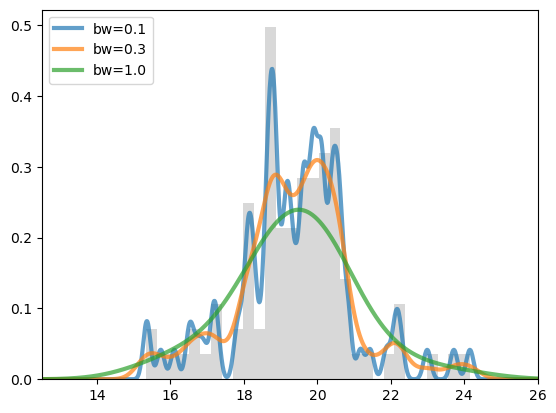

In [24]:
fig, ax = plt.subplots()
for bandwidth in [0.1, 0.3, 1.0]:
    ax.plot(x_grid, kde_sklearn(x, x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.set_xlim(12.5, 26)
ax.legend(loc='upper left')

### Validación cruzada de ancho de banda en Scikit-Learn

In [25]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

{'bandwidth': 1.0}


In [26]:
f = lambda x: grid.score_samples(x[:, None])
f(np.array([1]))

array([-107.84959624])

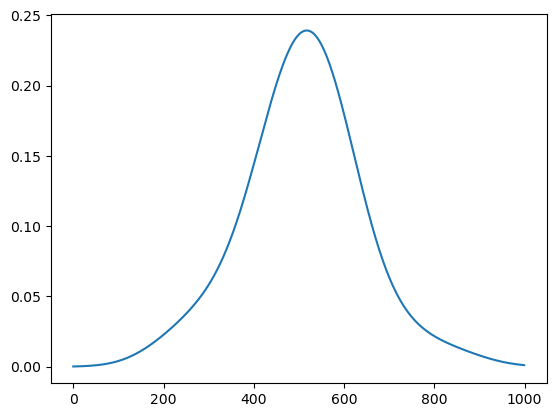

In [27]:
plt.plot(np.exp(grid.score_samples(x_grid[:, None])))

Text(0.5, 1.0, 'KDE using scikit-learn')

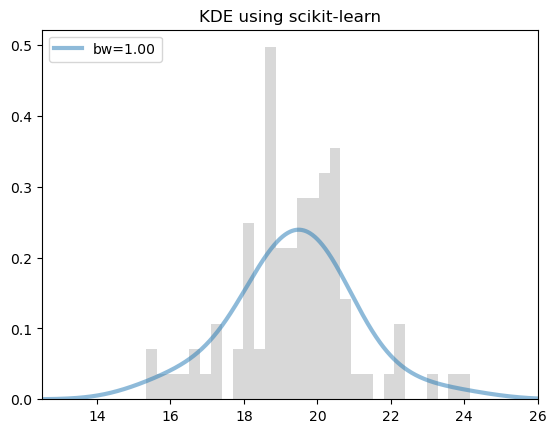

In [28]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(12.5, 26);
ax.set_title('KDE using scikit-learn')

### Validación cruzada de ancho de banda in Stats-models

#### Función de densidad de probabilidad

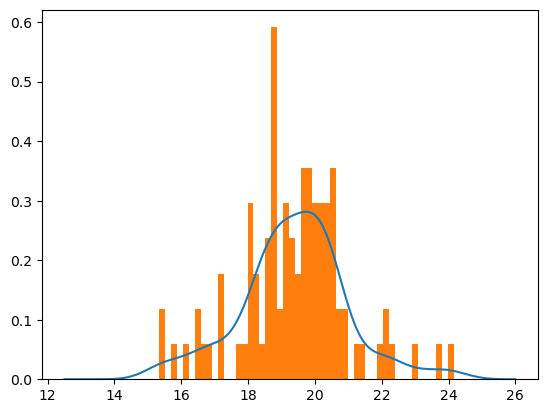

In [29]:
pdf = kde_statsmodels_m2(x)
plt.plot(x_grid, pdf(x_grid));
plt.hist(x, bins=50, density=True);

#### Función de distribución acumulada CDF

In [30]:
cdf= np.cumsum(pdf(x_grid))

Text(0.5, 1.0, 'Función de distribución acumulada CDF')

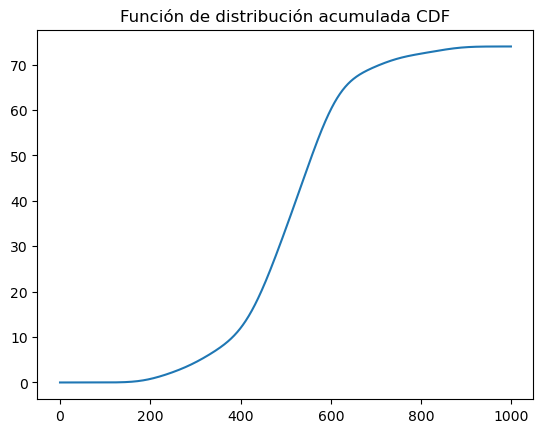

In [31]:
plt.plot(cdf)
plt.title("Función de distribución acumulada CDF")

## Comprobación de distribuciones

In [32]:
import scipy.stats as st     # Librería estadística
import statsmodels.api as sm 
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

In [33]:
tc_dolar = pd.read_excel(
    "Tipo de cambio.xlsx",
    sheet_name="Hoja1",
    index_col=[0],
    usecols=[0, 1]
)
x= tc_dolar.values
data= x.ravel()
data.shape

(96,)

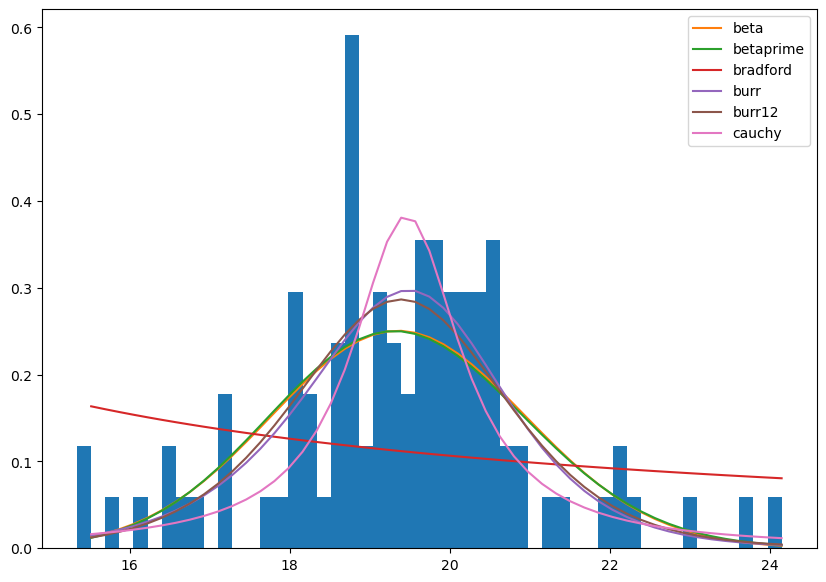

,distribución,error
0,beta,0.008163
1,betaprime,0.00824
2,bradford,0.017606
3,burr,0.007158
4,burr12,0.007409
5,cauchy,0.008548


In [34]:
#todas las distribuciones continuas
continuous_dist= [dist_i  for dist_i in dir(st) 
                  if isinstance(getattr(st,dist_i), getattr(st, 'rv_continuous'))]

fig, ax= plt.subplots(1,1, figsize=(10,7))

y,x, _= ax.hist(data, bins=50, density=True)
x= x[1:]

error_df= pd.DataFrame(columns= ['distribución', 'error'])
i= 0

#iteramos sobre todas y vemos cual se ajusta a los datos
for d in continuous_dist[4:10]:
    param= getattr(st, d).fit(data)
    y_hat= getattr(st,d).pdf(x, *param)
    error= np.mean((y-y_hat)**2)
    error_df.loc[i, 'distribución'] = d
    error_df.loc[i, 'error'] = error
    i += 1
    ax.plot(x, y_hat, label=f'{d}')

plt.legend()
plt.show()
error_df

In [35]:
error_df.sort_values('error')

,distribución,error
3,burr,0.007158
4,burr12,0.007409
0,beta,0.008163
1,betaprime,0.00824
5,cauchy,0.008548
2,bradford,0.017606


## Quantil- Quantil


### Beta

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


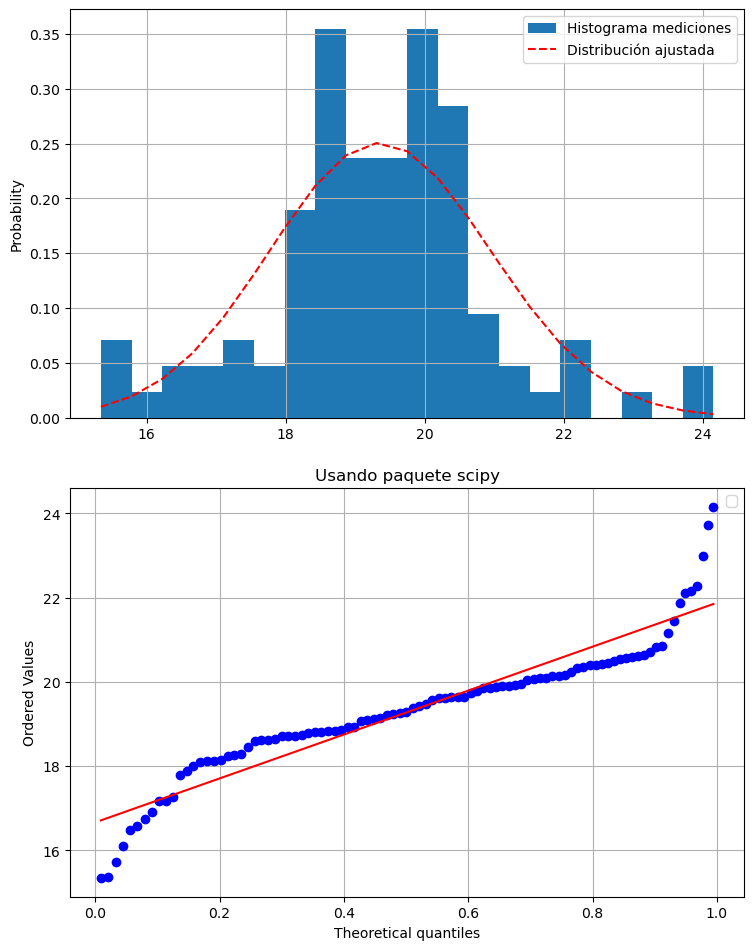

In [36]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'beta'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Betaprime

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


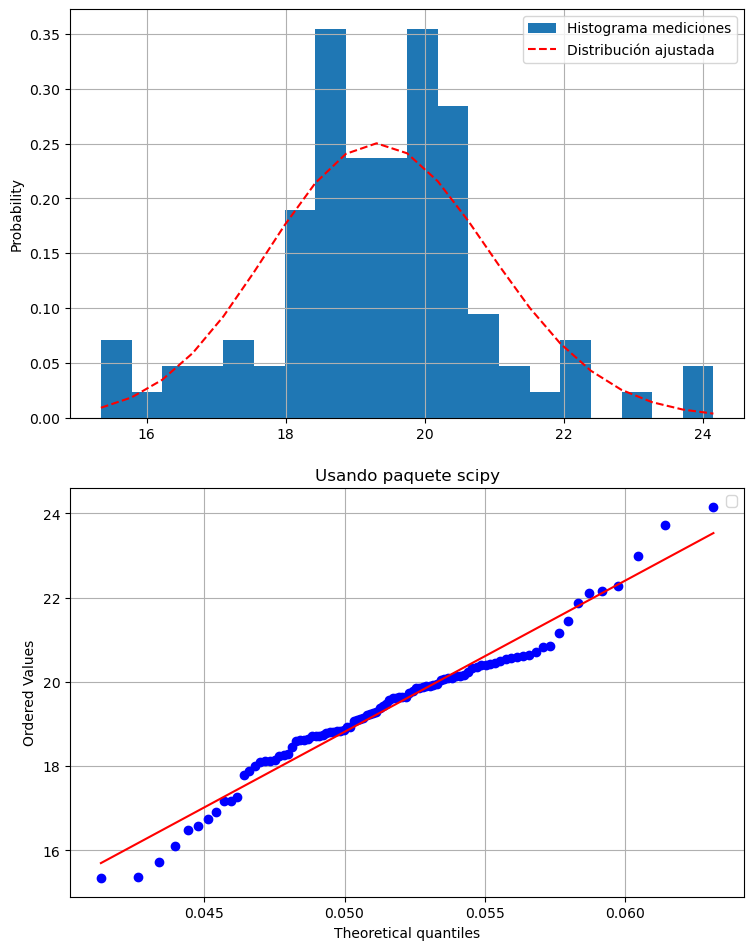

In [37]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'betaprime'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Burr

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


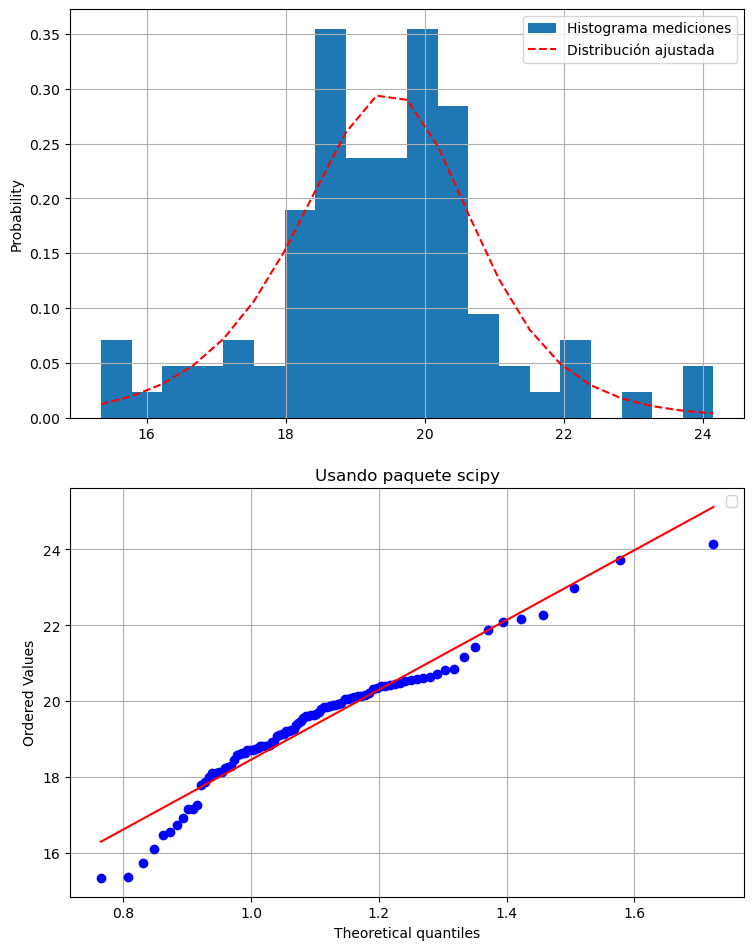

In [38]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'burr'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Burr12

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


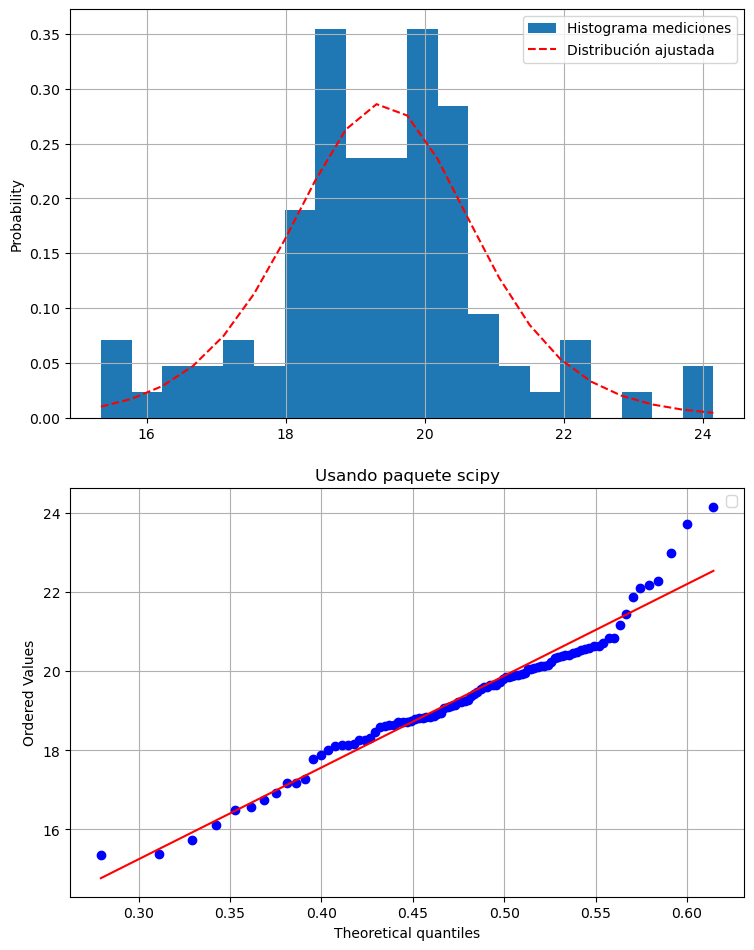

In [39]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'burr12'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Cauchy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


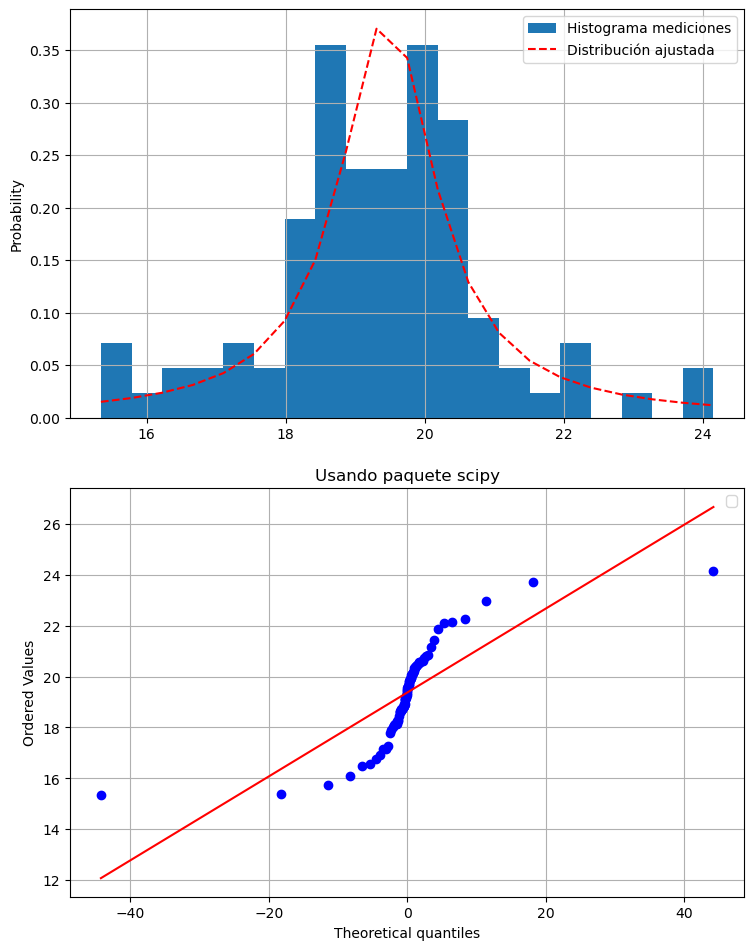

In [40]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'cauchy'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Bradford

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


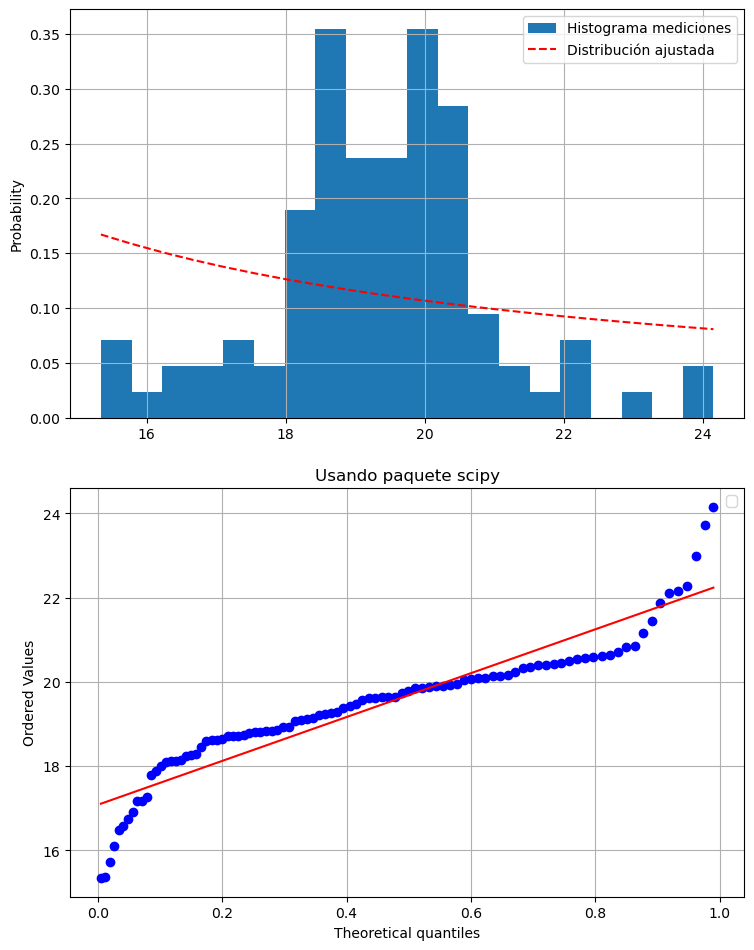

In [41]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'bradford'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

## Prueba de hipótesis de Kolmogorov-Smirnov

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: los datos se ajustan a la distribución aplicada.

> $H_a$: los datos no se ajustan a la distribución aplicada

Se utilizará un valor de significancia del 5%.

### Beta

In [42]:
# Ajustar la distribución Burr XII a los datos
from scipy.stats import beta, betaprime, burr, burr12, cauchy, bradford
from scipy.stats import kstest
parametros = beta.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'beta', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

Estadístico D:  0.08945308518246886
p-valor:  0.40243426988865105


No se puede rechazar la hipótesis nula. Se puede decir que los datos siguen una distribución beta.

### Betaprime

In [43]:
# Ajustar la distribución Burr XII a los datos
parametros = betaprime.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'betaprime', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

Estadístico D:  0.08978285158791
p-valor:  0.397911761262159


No se puede rechazar la hipótesis nula. Se puede decir que los datos siguen una distribución betaprime.

### Burr

In [44]:
# Ajustar la distribución Burr XII a los datos
parametros = burr.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'burr', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

Estadístico D:  0.05787264223587685
p-valor:  0.8860527540425058


No se puede rechazar la hipótesis nula. Se puede decir que los datos siguen una distribución burr.

### Burr12

In [45]:
# Ajustar la distribución Burr XII a los datos
parametros = burr12.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'burr12', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

Estadístico D:  0.06599655751689515
p-valor:  0.7720780299312334


No se puede rechazar la hipótesis nula. Se puede decir que los datos siguen una distribución burr12.

### Cauchy

In [46]:
# Ajustar la distribución Burr XII a los datos
parametros = cauchy.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'cauchy', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

Estadístico D:  0.07801531368873293
p-valor:  0.5758170183720341


No se puede rechazar la hipótesis nula. Se puede decir que los datos siguen una distribución cauchy.

### Bradford

In [47]:
# Ajustar la distribución Burr XII a los datos
parametros = bradford.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'bradford', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

Estadístico D:  0.25125919876375036
p-valor:  7.924004023643041e-06


Se rechaza la hipótesis nula. No se puede decir que los datos siguen una distribución bradford.

## Criterio AIC y BIC

In [48]:
# ajustar distribuciones
param_cauchy = cauchy.fit(data)
param_bradford = bradford.fit(data)
param_burr = burr.fit(data)
param_burr12 = burr12.fit(data)
param_beta = beta.fit(data)
param_betaprime = betaprime.fit(data)

# calcular log-verosimilitud y número de parámetros
log_likelihood_cauchy = np.sum(cauchy.logpdf(data, *param_cauchy))
log_likelihood_bradford = np.sum(bradford.logpdf(data, *param_bradford))
log_likelihood_burr = np.sum(burr.logpdf(data, *param_burr))
log_likelihood_burr12 = np.sum(burr12.logpdf(data, *param_burr12))
log_likelihood_beta = np.sum(beta.logpdf(data, *param_beta))
log_likelihood_betaprime = np.sum(betaprime.logpdf(data, *param_betaprime))
num_params_cauchy = len(param_cauchy)
num_params_bradford = len(param_bradford)
num_params_burr = len(param_burr)
num_params_burr12 = len(param_burr12)
num_params_beta = len(param_beta)
num_params_betaprime = len(param_betaprime)

# calcular AIC y BIC para cada distribución
n = len(x)
aic_cauchy = 2 * num_params_cauchy - 2 * log_likelihood_cauchy
bic_cauchy = np.log(n) * num_params_cauchy - 2 * log_likelihood_cauchy
aic_bradford = 2 * num_params_bradford - 2 * log_likelihood_bradford
bic_bradford = np.log(n) * num_params_bradford - 2 * log_likelihood_bradford
aic_burr = 2 * num_params_burr - 2 * log_likelihood_burr
bic_burr = np.log(n) * num_params_burr - 2 * log_likelihood_burr
aic_burr12 = 2 * num_params_burr12 - 2 * log_likelihood_burr12
bic_burr12 = np.log(n) * num_params_burr12 - 2 * log_likelihood_burr12
aic_beta = 2 * num_params_beta - 2 * log_likelihood_beta
bic_beta = np.log(n) * num_params_beta - 2 * log_likelihood_beta
aic_betaprime = 2 * num_params_betaprime - 2 * log_likelihood_betaprime
bic_betaprime = np.log(n) * num_params_betaprime - 2 * log_likelihood_betaprime


# imprimir resultados
print("AIC para cauchy: {:.2f}".format(aic_cauchy))
print("BIC para cauchy: {:.2f}".format(bic_cauchy))
print("AIC para bradford: {:.2f}".format(aic_bradford))
print("BIC para bradford: {:.2f}".format(bic_bradford))
print("AIC para burr: {:.2f}".format(aic_burr))
print("BIC para burr: {:.2f}".format(bic_burr))
print("AIC para burr12: {:.2f}".format(aic_burr12))
print("BIC para burr12: {:.2f}".format(bic_burr12))
print("AIC para beta: {:.2f}".format(aic_beta))
print("BIC para beta: {:.2f}".format(bic_beta))
print("AIC para betaprime: {:.2f}".format(aic_betaprime))
print("BIC para betaprime: {:.2f}".format(bic_betaprime))

min(aic_burr, aic_burr12, aic_beta, aic_betaprime, aic_cauchy, aic_bradford), min(bic_burr, bic_burr12, bic_beta, bic_betaprime, bic_cauchy, bic_bradford)

AIC para cauchy: 380.32
BIC para cauchy: 382.41
AIC para bradford: 424.51
BIC para bradford: 427.64
AIC para burr: 364.11
BIC para burr: 368.29
AIC para burr12: 365.20
BIC para burr12: 369.37
AIC para beta: 369.72
BIC para beta: 373.90
AIC para betaprime: 369.79
BIC para betaprime: 373.97


(364.1136210734533, 368.29171082434704)

La distribución burr pasó la prueba de hipótesis de Kolmogorov-Smirnov, además obtuvo el AIC y BIC más bajo de todas las distribuciones. Por lo que la mejor distribución para los datos del nodo 1 es la de **burr**.

## KDE / Comprobación de distribuciones

In [49]:
pdf = kde_statsmodels_m2(x)
error1 = (pdf(x) - x) ** 2
rmse1 = np.sqrt(np.mean(error1))
print("RMSE de la PDF 1:", rmse1)

param_burr = burr.fit(data)
dist='burr'
y_hat = getattr(st, dist).pdf(x, *param_burr)
error2 = (y_hat - x) ** 2
rmse2 = np.sqrt(np.mean(error2))
print("RMSE de la PDF 2:", rmse2)

mse1 = np.mean((pdf(x) - x) ** 2)
print("MSE de la PDF 1:", mse1)
mse2 = np.mean((y_hat - x) ** 2)
print("MSE de la PDF 2:", mse2)

mae1 = np.mean(np.abs(pdf(x) - x))
print("MAE de la PDF 1:", mae1)
mae2 = np.mean(np.abs(y_hat - x))
print("MAE de la PDF 2:", mae2)


RMSE de la PDF 1: 19.83213451557393
RMSE de la PDF 2: 19.82258632756792
MSE de la PDF 1: 393.31355944381886
MSE de la PDF 2: 392.93492871388264
MAE de la PDF 1: 19.652028547557766
MAE de la PDF 2: 19.64018797488496


Los errores son muy cercanos, sin embargo los de la PDF 2 son menores. Entonces usaremos el método de comprobación de distribuciones para el nodo 1 con al distribución de burr.

# Método de acpetación y  rechazo

In [50]:
x= tc_dolar.values
x= x.ravel()

El máximo de la función es: 0.2972529598971872


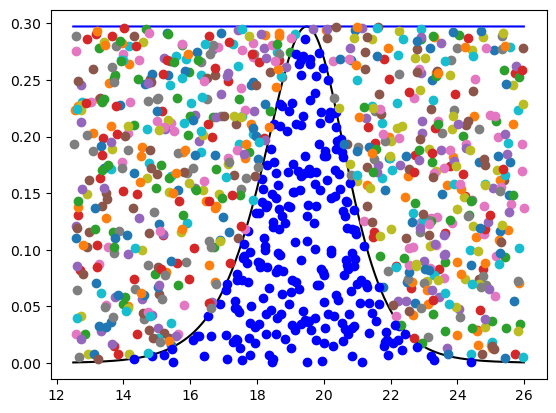

In [51]:
from scipy import optimize
N = 1000  # número de puntos
# Función objetivo
f = lambda x: burr.pdf(x, *param_burr)
x = np.arange(12.5, 26,0.01)
# Encuentro el máximo de la función f
c = float(f(optimize.fmin(lambda x:-f(x),0,disp=False)))
print('El máximo de la función es:',c)

t = lambda x: c* np.ones(len(x))

plt.plot(x,f(x),'k')
plt.plot(x,t(x),'b')
R2 = np.random.rand(N)
R1 = np.random.uniform(12.5, 26, N)

Acep_rechazo(R2,R1,f,t)

plt.show()

### Muestreo estratificado (intervalos igualmente espaciados)

In [52]:
N = 1000
a=12.5
b=26
B=N

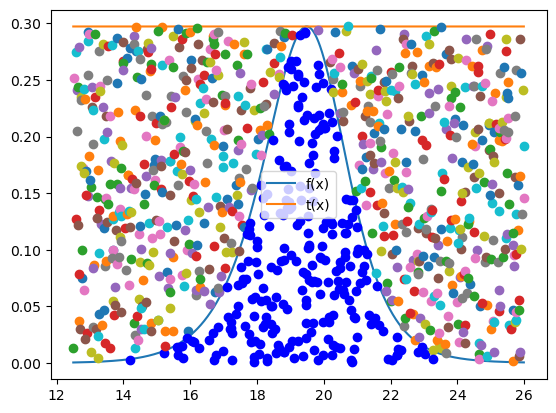

array([12.5 , 12.51, 12.52, ..., 25.97, 25.98, 25.99])

In [53]:
N = 1000
R2 = np.random.rand(N)
R1_est = m_estratificado(12.5, 26, N)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2, R1_est, f, t)

### Muestreo estratificado (el tamaño de los estratos no esta igualmente espaciado)

In [54]:
tc = np.array(Acep_rechazo3(R2, R1_est, f, t))
print(len(tc))
n1= (tc < 18.5).sum() 
n2= (tc < 20.5).sum() - (tc < 18.5).sum() 
n3= (tc > 20.5).sum() 

nt= n1 + n2 + n3 

n1/nt , n2/nt , n3/nt

251


(0.2788844621513944, 0.5219123505976095, 0.199203187250996)

In [55]:
N=1000
w1=256
w2=528
w3=216

r1 = np.random.uniform(12.5, 18, w1)
r2 = np.random.uniform(18, 20.5, w2)
r3 = np.random.uniform(20.5, 26, w3)

random = np.concatenate((r1, r2, r3), axis=0)
w1,w2,w3

(256, 528, 216)

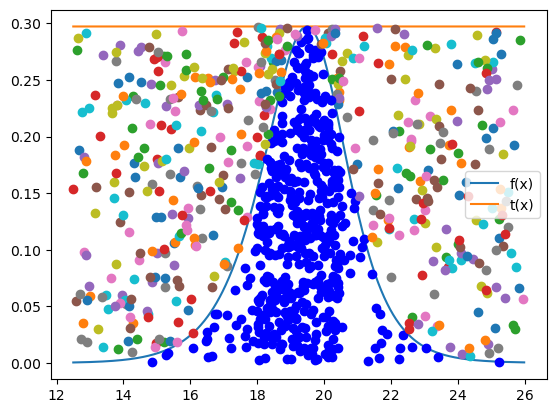

array([12.5 , 12.51, 12.52, ..., 25.97, 25.98, 25.99])

In [56]:
R2 = np.random.rand(N)
R1_estp = random
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2, R1_estp, f, t)

### Números complementarios

In [57]:
n=int(N/2)
r = np.random.uniform(a,b,n)
rc = b - r + a

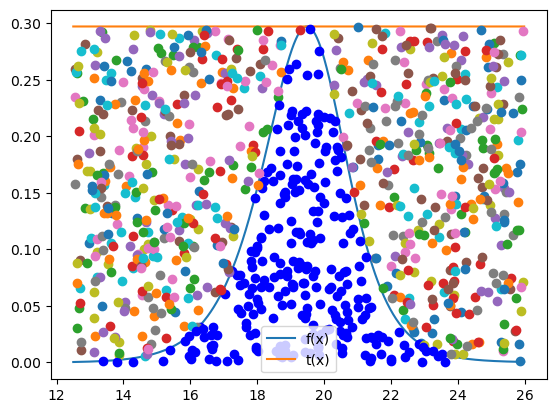

array([12.5 , 12.51, 12.52, ..., 25.97, 25.98, 25.99])

In [58]:
N = 1000
R2 = np.random.rand(N)
R1_com = np.concatenate((r, rc))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2, R1_com, f, t)

In [59]:
acep= len(Acep_rechazo3(R2, R1, f, t))
acep_est=len(Acep_rechazo3(R2, R1_est, f, t))
acep_com= len(Acep_rechazo3(R2, R1_com, f, t))
acep_estp= len(Acep_rechazo3(R2, R1_estp, f, t))
acep, acep_est, acep_com, acep_estp

(258, 250, 260, 498)

In [60]:
p= np.array(Acep_rechazo3(R2, R1_estp, f, t))
prob= (p > 18.0099).sum() 
nodo1= prob/len(p)
nodo1

0.929718875502008

## Nodo 2: Simulación del diferencial de inflación

## Kernel Density Estimation

In [61]:
dif_inf = pd.read_excel(
    "Inflacion Mexico.xlsx",
    sheet_name="Hoja2",
    index_col=[0],
    usecols=[0, 1]
)
y= dif_inf.values
y= y.ravel()
#Datos
dif_inf

,Diferencial
Fecha,
2015-04-01,0.033
2015-05-01,0.029
2015-06-01,0.028
2015-07-01,0.025
2015-08-01,0.024
...,...
2022-11-01,0.007
2022-12-01,0.013
2023-01-01,0.015


In [62]:
y= dif_inf.values
y= y.ravel()
y.shape
y_grid = np.linspace(-0.02, 0.05, 1000)

### Histograma

<AxesSubplot:ylabel='Density'>

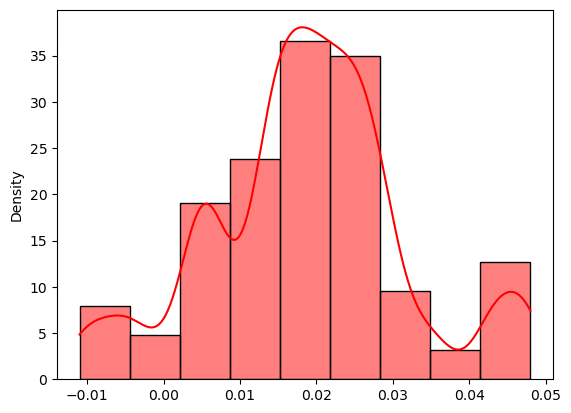

In [63]:
sns.histplot(data=y, stat='density', kde=True, kde_kws={'bw_method': .2}, color='r', bins=9)

<AxesSubplot:ylabel='Density'>

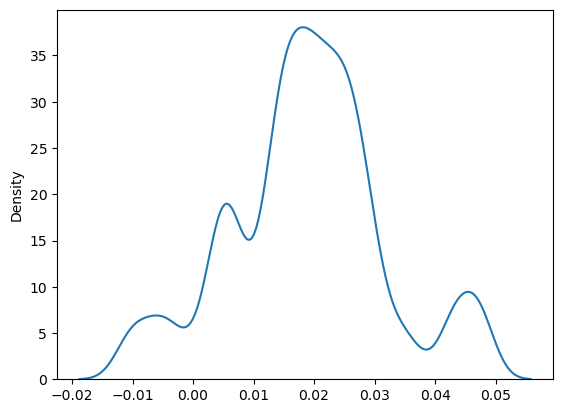

In [64]:
sns.kdeplot(data=y, bw_method=0.2)

### Selección de ancho de banda

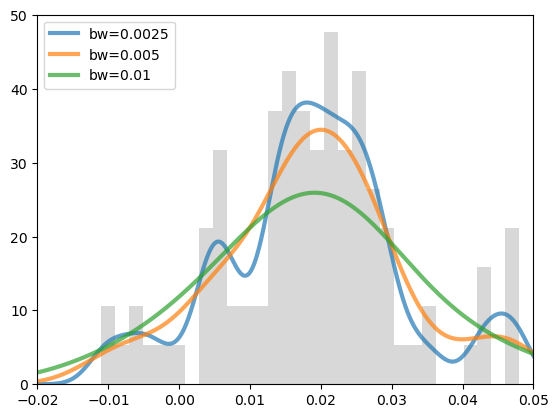

In [65]:
fig, ax = plt.subplots()
for bandwidth in [0.0025, 0.005, .01]:
    ax.plot(y_grid, kde_sklearn(y, y_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(y, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.set_xlim(-0.02, .05)
ax.legend(loc='upper left')

### Validación cruzada de ancho de banda en Scikit-Learn

In [66]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.005, 0.002, 1)},
                    cv=20) # 20-fold cross-validation
grid.fit(y[:, None])
print(grid.best_params_)

{'bandwidth': 0.005}


In [67]:
f = lambda y: grid.score_samples(y[:, None])
f(np.array([1]))

array([-18126.26496936])

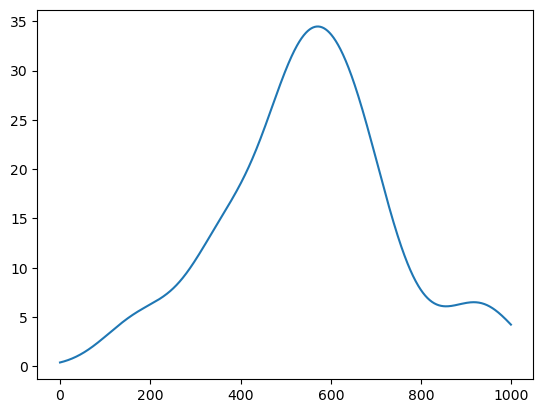

In [68]:
plt.plot(np.exp(grid.score_samples(y_grid[:, None])))

Text(0.5, 1.0, 'KDE using scikit-learn')

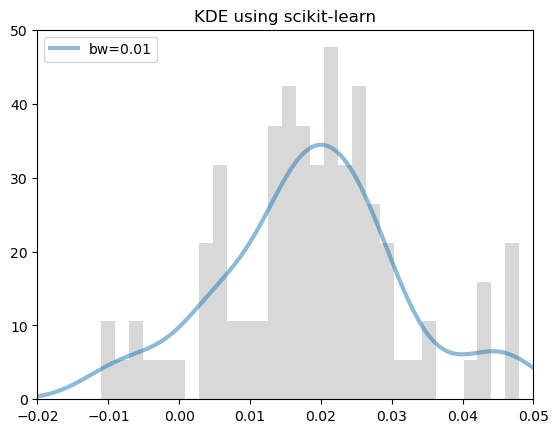

In [69]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(y_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(y_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(y, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(-.02, 0.05, 30);
ax.set_title('KDE using scikit-learn')

### Validación cruzada de ancho de banda in Stats-models

#### Función de densidad de probabilidad

In [ ]:
kde_statsmodels_m2(y)
pdf_y = kde_statsmodels_m2(y)
plt.plot(y_grid, pdf_y(y_grid))
plt.hist(y, bins=50, density=True)

#### Función de distribución acumulada CDF

In [ ]:
cdf_y= np.cumsum(pdf_y(y_grid))

In [ ]:
plt.plot(cdf_y);
plt.title("Función de distribución acumulada CDF");

## Comprobación de distribuciones

In [ ]:
dif_inf = pd.read_excel(
    "Inflacion Mexico.xlsx",
    sheet_name="Hoja2",
    index_col=[0],
    usecols=[0, 1]
)
y= dif_inf.values
data= y.ravel()
data.shape

In [ ]:
#todas las distribuciones continuas
continuous_dist= [dist_i  for dist_i in dir(st) 
                  if isinstance(getattr(st,dist_i), getattr(st, 'rv_continuous'))]

fig, ax= plt.subplots(1,1, figsize=(10,7))

y,x, _= ax.hist(data, bins=50, density=True)
x= x[1:]

error_df= pd.DataFrame(columns= ['distribución', 'error'])
i= 0

#iteramos sobre todas y vemos cual se ajusta a los datos
for d in continuous_dist[4:10]:
    param= getattr(st, d).fit(data)
    y_hat= getattr(st,d).pdf(x, *param)
    error= np.mean((y-y_hat)**2)
    error_df.loc[i, 'distribución'] = d
    error_df.loc[i, 'error'] = error
    i += 1
    ax.plot(x, y_hat, label=f'{d}')

plt.legend()
plt.show()
error_df

In [ ]:
error_df.sort_values('error')

## Quantil- Quantil


### Beta

In [ ]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'beta'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Betaprime

In [ ]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'betaprime'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Burr

In [ ]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'burr'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Burr12

In [ ]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'burr12'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Cauchy

In [ ]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'cauchy'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Bradford

In [ ]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'bradford'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

In [ ]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'cauchy'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

## Prueba de hipótesis de Kolmogorov-Smirnov

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: los datos se ajustan a la distribución aplicada.

> $H_a$: los datos no se ajustan a la distribución aplicada

Se utilizará un valor de significancia del 5%.

### Beta

In [ ]:
# Ajustar la distribución Burr XII a los datos
parametros = beta.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'beta', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

### Betaprime

In [ ]:
# Ajustar la distribución Burr XII a los datos
parametros = betaprime.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'betaprime', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

No se puede rechazar la hipótesis nula. Se puede decir que los datos siguen una distribución betaprime.

### Burr

In [ ]:
# Ajustar la distribución Burr XII a los datos
parametros = burr.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'burr', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

Se rechaza la hipótesis nula. No se puede decir que los datos siguen una distribución burr.

### Burr12

In [ ]:
# Ajustar la distribución Burr XII a los datos
parametros = burr12.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'burr12', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

No se puede rechazar la hipótesis nula. Se puede decir que los datos siguen una distribución burr12.

### Cauchy

In [ ]:
# Ajustar la distribución Burr XII a los datos
parametros = cauchy.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'cauchy', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

No se puede rechazar la hipótesis nula. Se puede decir que los datos siguen una distribución cauchy.

### Bradford

In [ ]:
# Ajustar la distribución Burr XII a los datos
parametros = bradford.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'bradford', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

Se rechaza la hipótesis nula. No se puede decir que los datos siguen una distribución bradford.

## Criterio AIC y BIC

In [ ]:
# ajustar distribuciones
param_cauchy = cauchy.fit(data)
param_bradford = bradford.fit(data)
param_burr = burr.fit(data)
param_burr12 = burr12.fit(data)
param_beta = beta.fit(data)
param_betaprime = betaprime.fit(data)

# calcular log-verosimilitud y número de parámetros
log_likelihood_cauchy = np.sum(cauchy.logpdf(data, *param_cauchy))
log_likelihood_bradford = np.sum(bradford.logpdf(data, *param_bradford))
log_likelihood_burr = np.sum(burr.logpdf(data, *param_burr))
log_likelihood_burr12 = np.sum(burr12.logpdf(data, *param_burr12))
log_likelihood_beta = np.sum(beta.logpdf(data, *param_beta))
log_likelihood_betaprime = np.sum(betaprime.logpdf(data, *param_betaprime))
num_params_cauchy = len(param_cauchy)
num_params_bradford = len(param_bradford)
num_params_burr = len(param_burr)
num_params_burr12 = len(param_burr12)
num_params_beta = len(param_beta)
num_params_betaprime = len(param_betaprime)

# calcular AIC y BIC para cada distribución
n = len(x)
aic_cauchy = 2 * num_params_cauchy - 2 * log_likelihood_cauchy
bic_cauchy = np.log(n) * num_params_cauchy - 2 * log_likelihood_cauchy
aic_bradford = 2 * num_params_bradford - 2 * log_likelihood_bradford
bic_bradford = np.log(n) * num_params_bradford - 2 * log_likelihood_bradford
aic_burr = 2 * num_params_burr - 2 * log_likelihood_burr
bic_burr = np.log(n) * num_params_burr - 2 * log_likelihood_burr
aic_burr12 = 2 * num_params_burr12 - 2 * log_likelihood_burr12
bic_burr12 = np.log(n) * num_params_burr12 - 2 * log_likelihood_burr12
aic_beta = 2 * num_params_beta - 2 * log_likelihood_beta
bic_beta = np.log(n) * num_params_beta - 2 * log_likelihood_beta
aic_betaprime = 2 * num_params_betaprime - 2 * log_likelihood_betaprime
bic_betaprime = np.log(n) * num_params_betaprime - 2 * log_likelihood_betaprime


# imprimir resultados
print("AIC para cauchy: {:.2f}".format(aic_cauchy))
print("BIC para cauchy: {:.2f}".format(bic_cauchy))
print("AIC para bradford: {:.2f}".format(aic_bradford))
print("BIC para bradford: {:.2f}".format(bic_bradford))
print("AIC para burr: {:.2f}".format(aic_burr))
print("BIC para burr: {:.2f}".format(bic_burr))
print("AIC para burr12: {:.2f}".format(aic_burr12))
print("BIC para burr12: {:.2f}".format(bic_burr12))
print("AIC para beta: {:.2f}".format(aic_beta))
print("BIC para beta: {:.2f}".format(bic_beta))
print("AIC para betaprime: {:.2f}".format(aic_betaprime))
print("BIC para betaprime: {:.2f}".format(bic_betaprime))

min(aic_burr, aic_burr12, aic_beta, aic_betaprime, aic_cauchy, aic_bradford), min(bic_burr, bic_burr12, bic_beta, bic_betaprime, bic_cauchy, bic_bradford)

La distribución burr12 pasó la prueba de hipótesis de Kolmogorov-Smirnov, además obtuvo el AIC y BIC más bajo de todas las distribuciones. Por lo que la mejor distribución para los datos del nodo 2 es la de **burr12**.

## KDE / Comprobación de distribuciones

In [ ]:
y= dif_inf.values
y= y.ravel()

pdf_y = kde_statsmodels_m2(y)
error1 = (pdf_y(y) - y) ** 2
rmse1 = np.sqrt(np.mean(error1))
print("RMSE de la PDF 1:", rmse1)

param_burr12 = burr12.fit(y)
dist='burr12'
y_hat = getattr(st, dist).pdf(y, *param_burr12)
error2 = (y_hat - y) ** 2
rmse2 = np.sqrt(np.mean(error2))
print("RMSE de la PDF 2:", rmse2)

mse1 = np.mean((pdf_y(y) - y) ** 2)
print("MSE de la PDF 1:", mse1)
mse2 = np.mean((y_hat - y) ** 2)
print("MSE de la PDF 2:", mse2)

mae1 = np.mean(np.abs(pdf_y(y) - y))
print("MAE de la PDF 1:", mae1)
mae2 = np.mean(np.abs(y_hat - y))
print("MAE de la PDF 2:", mae2)

Los errores de la PDF 2 son menores, por lo que se usará el método de comprobación de distribuciones para hacer el ajuste del nodo 2 con al distribución burr12.

# Método de aceptación y rechazo

In [ ]:
N = 1000
a=-.02
b=.05
B=N

In [ ]:
n=int(N/2)
r = np.random.uniform(a,b,n)
rc = b - r + a

In [ ]:
y= dif_inf.values
y= y.ravel()

In [ ]:
from scipy import optimize
N = 1000  # número de puntos
# Función objetivo
f = lambda x: burr12.pdf(x, *param_burr12)
x = np.arange(-.02, .05, 0.0001)
# Encuentro el máximo de la función f
c = float(f(optimize.fmin(lambda x:-f(x),0,disp=False)))
print('El máximo de la función es:',c)

t = lambda x: c* np.ones(len(x))

plt.plot(x,f(x),'k')
plt.plot(x,t(x),'b')
R2 = np.random.rand(N)
R1 = np.random.uniform(-.02, .05,N)

Acep_rechazo(R2,R1,f,t)

plt.show()

### Muestreo estratificado (intervalos igualmente espaciados)

In [ ]:
N = 1000
R2 = np.random.rand(N)
R1_est = m_estratificado(-.02, .05, B)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2, R1, f, t)

### Muestreo estratificado (el tamaño de los estratos no esta igualmente espaciado

In [ ]:
ti = np.array(Acep_rechazo3(R2, R1, f, t))
len(ti)

n1 = (ti < 0.01).sum()
n2= (ti < 0.03).sum() - (ti < 0.01).sum()
n3= (ti > 0.03).sum()


nt= n1 + n2 + n3 

n1/nt,  n2/nt, n3/nt, n1, n2, n3

In [ ]:
N=1000
w1=int(round(N*(n1/nt)))
w2=int(round(N*(n2/nt)))
w3=int(round(N*(n3/nt)))

r1 = np.random.uniform(a, 0.01, w1)
r2 = np.random.uniform(0.01, 0.03, w2)
r3 = np.random.uniform(0.03, b, w3)

random = np.concatenate((r1, r2, r3), axis=0)
len(random)

In [ ]:
R2 = np.random.rand(N)
R1_estp = random
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2, R1_estp, f, t)

### Números complementarios

In [ ]:
N = 1000
R2 = np.random.rand(N)
R1_com = np.concatenate((r, rc))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2, R1, f, t)

In [ ]:
acep= len(Acep_rechazo3(R2, R1, f, t))
acep_est=len(Acep_rechazo3(R2, R1_est, f, t))
acep_com= len(Acep_rechazo3(R2, R1_com, f, t))
acep_estp= len(Acep_rechazo3(R2, R1_estp, f, t))
acep, acep_est, acep_com, acep_estp

In [ ]:
p= np.array(Acep_rechazo3(R2, R1_estp, f, t))
prob= (p < 0.019).sum() 
nodo2= prob/len(p)
nodo2

## Nodo 3: Simulación de diferencial de tasa de interés

In [ ]:
# El grid que usaremos para graficar

z_grid = np.linspace(0.65, 7.20, 1000)

### Histograma

In [ ]:
sns.histplot(data=z, stat='density', kde=True, kde_kws={'bw_method': .2}, color='r', bins=9);

In [ ]:
sns.kdeplot(data=z, bw_method=0.2)

### Selección de ancho de banda

La selección del ancho debanda es muy importante del KDE. Para los mismos datos, diferentes anchos de banda pueden producir diferentes resultados. 

In [ ]:
fig, ax = plt.subplots()
for bandwidth in [0.1, 0.3, 1.0]:
    ax.plot(z_grid, kde_sklearn(z, z_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(z, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.set_xlim(0.65, 7.20)
ax.legend(loc='upper left')

### Validación cruzada de ancho de banda en Scikit-Learn

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(z[:, None])
print(grid.best_params_)

In [ ]:
f = lambda z: grid.score_samples(y[:, None])
f(np.array([1]))

In [ ]:
plt.plot(np.exp(grid.score_samples(z_grid[:, None])))

In [ ]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(z_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(z_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(z, 50, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(0.65, 7.20);
ax.set_title('KDE using scikit-learn')

### Validación cruzada de ancho de banda in Stats-models

#### Función de densidad de probabilidad

In [ ]:
pdf_z = kde_statsmodels_m2(z)
plt.plot(z_grid, pdf_z(z_grid));
plt.hist(z, bins=50, density=True);

#### Función de distribución acumulada CDF

In [ ]:
cdf= np.cumsum(pdf_z(z_grid))

In [ ]:
plt.plot(cdf)
plt.title("Función de distribución acumulada CDF")

## Comprobación de distribuciones

In [ ]:
dif_tasaint = pd.read_excel(
    "tasadeinteresmex-usa.xlsx",
    sheet_name="DIFERENCIAL",
    index_col=[0],
    usecols=[0, 1]
)
z= dif_tasaint.values
data= z.ravel()


In [ ]:
#todas las distribuciones continuas
continuous_dist= [dist_i  for dist_i in dir(st) 
                  if isinstance(getattr(st,dist_i), getattr(st, 'rv_continuous'))]

fig, ax= plt.subplots(1,1, figsize=(10,7))

y,x, _= ax.hist(data, bins=50, density=True)
x= x[1:]

error_df= pd.DataFrame(columns= ['distribución', 'error'])
i= 0

#iteramos sobre todas y vemos cual se ajusta a los datos
for d in continuous_dist[4:10]:
    param= getattr(st, d).fit(data)
    y_hat= getattr(st,d).pdf(x, *param)
    error= np.mean((y-y_hat)**2)
    error_df.loc[i, 'distribución'] = d
    error_df.loc[i, 'error'] = error
    i += 1
    ax.plot(x, y_hat, label=f'{d}')

plt.legend()
plt.show()
error_df

In [ ]:
error_df.sort_values('error')

## Quantil- Quantil


### Beta

In [ ]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'beta'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Betaprime

In [ ]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'betaprime'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Burr

In [ ]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'burr'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Burr12

In [ ]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'burr12'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Cauchy

In [ ]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'cauchy'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Bradford

In [ ]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'bradford'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

## Prueba de hipótesis de Kolmogorov-Smirnov

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: los datos se ajustan a la distribución aplicada.

> $H_a$: los datos no se ajustan a la distribución aplicada

Se utilizará un valor de significancia del 5%.

### Beta

In [ ]:
# Ajustar la distribución Burr XII a los datos
parametros = beta.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'beta', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

### Betaprime

In [ ]:
# Ajustar la distribución Burr XII a los datos
parametros = betaprime.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'betaprime', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

No se puede rechazar la hipótesis nula. Se puede decir que los datos siguen una distribución betaprime.

### Burr

In [ ]:
# Ajustar la distribución Burr XII a los datos
parametros = burr.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'burr', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

No se puede rechazar la hipótesis nula. Se puede decir que los datos siguen una distribución burr.

### Burr12

In [ ]:
# Ajustar la distribución Burr XII a los datos
parametros = burr12.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'burr12', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

No se puede rechazar la hipótesis nula. Se puede decir que los datos siguen una distribución burr12.

### Cauchy

In [ ]:
# Ajustar la distribución Burr XII a los datos
parametros = cauchy.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'cauchy', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

No se puede rechazar la hipótesis nula. Se puede decir que los datos siguen una distribución cauchy.

### Bradford

In [ ]:
# Ajustar la distribución Burr XII a los datos
parametros = bradford.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'bradford', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

Se rechaza la hipótesis nula. No se puede decir que los datos siguen una distribución bradford.

## Criterio AIC y BIC

In [ ]:
# ajustar distribuciones
param_cauchy = cauchy.fit(data)
param_bradford = bradford.fit(data)
param_burr = burr.fit(data)
param_burr12 = burr12.fit(data)
param_beta = beta.fit(data)
param_betaprime = betaprime.fit(data)

# calcular log-verosimilitud y número de parámetros
log_likelihood_cauchy = np.sum(cauchy.logpdf(data, *param_cauchy))
log_likelihood_bradford = np.sum(bradford.logpdf(data, *param_bradford))
log_likelihood_burr = np.sum(burr.logpdf(data, *param_burr))
log_likelihood_burr12 = np.sum(burr12.logpdf(data, *param_burr12))
log_likelihood_beta = np.sum(beta.logpdf(data, *param_beta))
log_likelihood_betaprime = np.sum(betaprime.logpdf(data, *param_betaprime))
num_params_cauchy = len(param_cauchy)
num_params_bradford = len(param_bradford)
num_params_burr = len(param_burr)
num_params_burr12 = len(param_burr12)
num_params_beta = len(param_beta)
num_params_betaprime = len(param_betaprime)

# calcular AIC y BIC para cada distribución
n = len(x)
aic_cauchy = 2 * num_params_cauchy - 2 * log_likelihood_cauchy
bic_cauchy = np.log(n) * num_params_cauchy - 2 * log_likelihood_cauchy
aic_bradford = 2 * num_params_bradford - 2 * log_likelihood_bradford
bic_bradford = np.log(n) * num_params_bradford - 2 * log_likelihood_bradford
aic_burr = 2 * num_params_burr - 2 * log_likelihood_burr
bic_burr = np.log(n) * num_params_burr - 2 * log_likelihood_burr
aic_burr12 = 2 * num_params_burr12 - 2 * log_likelihood_burr12
bic_burr12 = np.log(n) * num_params_burr12 - 2 * log_likelihood_burr12
aic_beta = 2 * num_params_beta - 2 * log_likelihood_beta
bic_beta = np.log(n) * num_params_beta - 2 * log_likelihood_beta
aic_betaprime = 2 * num_params_betaprime - 2 * log_likelihood_betaprime
bic_betaprime = np.log(n) * num_params_betaprime - 2 * log_likelihood_betaprime


# imprimir resultados
print("AIC para cauchy: {:.2f}".format(aic_cauchy))
print("BIC para cauchy: {:.2f}".format(bic_cauchy))
print("AIC para bradford: {:.2f}".format(aic_bradford))
print("BIC para bradford: {:.2f}".format(bic_bradford))
print("AIC para burr: {:.2f}".format(aic_burr))
print("BIC para burr: {:.2f}".format(bic_burr))
print("AIC para burr12: {:.2f}".format(aic_burr12))
print("BIC para burr12: {:.2f}".format(bic_burr12))
print("AIC para beta: {:.2f}".format(aic_beta))
print("BIC para beta: {:.2f}".format(bic_beta))
print("AIC para betaprime: {:.2f}".format(aic_betaprime))
print("BIC para betaprime: {:.2f}".format(bic_betaprime))

min(aic_burr, aic_burr12, aic_beta, aic_betaprime, aic_cauchy, aic_bradford), min(bic_burr, bic_burr12, bic_beta, bic_betaprime, bic_cauchy, bic_bradford)

La distribución burr pasó la prueba de hipótesis de Kolmogorov-Smirnov, además obtuvo el AIC y BIC más bajo de todas las distribuciones. Por lo que la mejor distribución para los datos del nodo 3 es la de **burr**.

In [ ]:
pdf_z = kde_statsmodels_m2(z)
error1 = (pdf_z(z) - z) ** 2
rmse1 = np.sqrt(np.mean(error1))
print("RMSE de la PDF 1:", rmse1)

param_burr = burr.fit(z)
dist='burr'
y_hat = getattr(st, dist).pdf(z, *param_burr)
error2 = (y_hat - z) ** 2
rmse2 = np.sqrt(np.mean(error2))
print("RMSE de la PDF 2:", rmse2)

mse1 = np.mean((pdf_z(z) - z) ** 2)
print("MSE de la PDF 1:", mse1)
mse2 = np.mean((y_hat - z) ** 2)
print("MSE de la PDF 2:", mse2)

mae1 = np.mean(np.abs(pdf_z(z) - z))
print("MAE de la PDF 1:", mae1)
mae2 = np.mean(np.abs(y_hat - z))
print("MAE de la PDF 2:", mae2)

Los errores de la PDF 1 son menores, por lo que se usará el método de KDE para hacer el ajuste del nodo 3.

### Método de Acpetación-Rechazo

In [ ]:
from scipy import optimize
f = pdf_z
maxa=f(optimize.fmin(lambda x:-f(x), 0, disp=False))
t =lambda x: .39 * np.ones(len(x))
x = np.arange(0.65, 7.20, 0.01)

In [ ]:
a=0.65 #limite izq
b=7.20 #limite der
B=1000

In [ ]:
N = 1000
R2 = np.random.rand(N)
R1 = np.random.uniform(a, b, N)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2, R1, f, t)

### Muestreo estratificado (intervalos igualmente espaciados)

In [ ]:
N = 1000
R2 = np.random.rand(N)
R1_est = m_estratificado(0.65, 7.20, N)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2, R1, f, t)

### Muestreo estratificado (el tamaño de los estratos no esta igualmente espaciado)

In [ ]:
ti = np.array(Acep_rechazo3(R2, R1, f, t))
n1= (ti < 2).sum() 
n2= (ti < 4).sum() - (ti < 2).sum() 
n3= (ti < 5.2).sum() - (ti < 4).sum()
n4= (ti > 5.2).sum()

nt= n1 + n2 + n3 + n4

n1/nt ,  n2/nt , n3/nt , n4/nt

In [ ]:
N=1000
w1=116
w2=310
w3=299
w4=275

r1 = np.random.uniform(0.65, 2, w1)
r2 = np.random.uniform(2, 4, w2)
r3 = np.random.uniform(4, 5.2, w3)
r4 = np.random.uniform(5.2, 7.20, w4)

random = np.concatenate((r1, r2, r3, r4), axis=0)
w1,w2,w3,w4

In [ ]:
N = 1000
R2 = np.random.rand(N)
R1_estp = random
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2, R1_estp, f, t)

### Números complementarios 

In [ ]:
r = np.random.uniform(a,b,500)
rc = b - r + a

In [ ]:
N = 1000
R2 = np.random.rand(N)
R1_com = np.concatenate((r, rc))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2, R1, f, t)

In [ ]:
acep= len(Acep_rechazo3(R2, R1, f, t))
acep_est=len(Acep_rechazo3(R2, R1_est, f, t))
acep_com= len(Acep_rechazo3(R2, R1_com, f, t))
acep_estp= len(Acep_rechazo3(R2, R1_estp, f, t))
acep, acep_est, acep_com, acep_estp

In [ ]:
p= np.array(Acep_rechazo3(R2, R1_estp, f, t))
prob= (p > 7.05).sum() 
nodo3= prob/len(p)
nodo3

## Nodo 4: Simulación de diferencial de crecimiento

In [ ]:
# El grid que usaremos para graficar
w_grid = np.linspace(3.842000,6.039000, 1000)


### Histograma

In [ ]:
sns.histplot(data=w, stat='density', kde=True, kde_kws={'bw_method': .2}, color='r', bins=9);

In [ ]:
sns.kdeplot(data=w, bw_method=0.2)

### Selección de ancho de banda

La selección del ancho debanda es muy importante del KDE. Para los mismos datos, diferentes anchos de banda pueden producir diferentes resultados. 

In [ ]:
fig, ax = plt.subplots()
for bandwidth in [0.1, 0.3, 1.0]:
    ax.plot(w_grid, kde_sklearn(w, w_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(w,30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.set_xlim(3.842000,6.039000)
ax.legend(loc='upper left')

### Validación cruzada de ancho de banda en Scikit-Learn

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0,30)},
                    cv=20) # 20-fold cross-validation
grid.fit(w[:, None])
print(grid.best_params_)

In [ ]:
f = lambda w: grid.score_samples(w[:, None])
f(np.array([1]))

In [ ]:
plt.plot(np.exp(grid.score_samples(w_grid[:, None])))

In [ ]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(w_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(w_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(w, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(3.842000,6.039000);
ax.set_title('KDE using scikit-learn')

### Validación cruzada de ancho de banda in Stats-models

#### Función de densidad de probabilidad

In [ ]:
pdf_w = kde_statsmodels_m2(w)
plt.plot(w_grid, pdf_w(w_grid));
plt.hist(w, bins=50, density=True);

#### Función de distribución acumulada CDF

In [ ]:
cdf= np.cumsum(pdf_w(w_grid))

In [ ]:
plt.plot(cdf)
plt.title("Función de distribución acumulada CDF")

## Comprobación de distribuciones

In [ ]:
dif_crecimiento = pd.read_excel(
    "Diferencial crecimiento economico.xlsx",
    sheet_name="Hoja3",
    index_col=[0],
    usecols=[0, 1]
)
w= dif_crecimiento.values
data= w.ravel()

In [ ]:
#todas las distribuciones continuas
continuous_dist= [dist_i  for dist_i in dir(st) 
                  if isinstance(getattr(st,dist_i), getattr(st, 'rv_continuous'))]

fig, ax= plt.subplots(1,1, figsize=(10,7))

y,x, _= ax.hist(data, bins=50, density=True)
x= x[1:]

error_df= pd.DataFrame(columns= ['distribución', 'error'])
i= 0

#iteramos sobre todas y vemos cual se ajusta a los datos
for d in continuous_dist[4:10]:
    param= getattr(st, d).fit(data)
    y_hat= getattr(st,d).pdf(x, *param)
    error= np.mean((y-y_hat)**2)
    error_df.loc[i, 'distribución'] = d
    error_df.loc[i, 'error'] = error
    i += 1
    ax.plot(x, y_hat, label=f'{d}')

plt.legend()
plt.show()
error_df

In [ ]:
error_df.sort_values('error')

## Quantil- Quantil


### Beta

In [ ]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'beta'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Betaprime

In [ ]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'betaprime'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Burr

In [ ]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'burr'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Burr12

In [ ]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'burr12'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Cauchy

In [ ]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'cauchy'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Bradford

In [ ]:
measurements= data

# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(measurements, divisiones, density=True, label='Histograma mediciones')

#Distribución
dist = 'bradford'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

## Prueba de hipótesis de Kolmogorov-Smirnov

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: los datos se ajustan a la distribución aplicada.

> $H_a$: los datos no se ajustan a la distribución aplicada

Se utilizará un valor de significancia del 5%.

### Beta

In [ ]:
# Ajustar la distribución Burr XII a los datos
parametros = beta.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'beta', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

No se puede rechazar la hipótesis nula. Se puede decir que los datos siguen una distribución beta.

### Betaprime

In [ ]:
# Ajustar la distribución Burr XII a los datos
parametros = betaprime.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'betaprime', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

No se puede rechazar la hipótesis nula. Se puede decir que los datos siguen una distribución betaprime.

### Burr

In [ ]:
# Ajustar la distribución Burr XII a los datos
parametros = burr.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'burr', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

No se puede rechazar la hipótesis nula. Se puede decir que los datos siguen una distribución burr.

### Burr12

In [ ]:
# Ajustar la distribución Burr XII a los datos
parametros = burr12.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'burr12', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

No se puede rechazar la hipótesis nula. Se puede decir que los datos siguen una distribución burr12.

### Cauchy

In [ ]:
# Ajustar la distribución Burr XII a los datos
parametros = cauchy.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'cauchy', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

No se puede rechazar la hipótesis nula. Se puede decir que los datos siguen una distribución cauchy.

### Bradford

In [ ]:
# Ajustar la distribución Burr XII a los datos
parametros = bradford.fit(data)

# Realizar prueba de Kolmogorov-Smirnov
D, p_valor = kstest(data, 'bradford', args=parametros)

# Imprimir resultados
print("Estadístico D: ", D)
print("p-valor: ", p_valor)

Se rechaza la hipótesis nula. No se puede decir que los datos siguen una distribución bradford.

## Criterio AIC y BIC

In [ ]:
# ajustar distribuciones
param_cauchy = cauchy.fit(data)
param_bradford = bradford.fit(data)
param_burr = burr.fit(data)
param_burr12 = burr12.fit(data)
param_beta = beta.fit(data)
param_betaprime = betaprime.fit(data)

# calcular log-verosimilitud y número de parámetros
log_likelihood_cauchy = np.sum(cauchy.logpdf(data, *param_cauchy))
log_likelihood_bradford = np.sum(bradford.logpdf(data, *param_bradford))
log_likelihood_burr = np.sum(burr.logpdf(data, *param_burr))
log_likelihood_burr12 = np.sum(burr12.logpdf(data, *param_burr12))
log_likelihood_beta = np.sum(beta.logpdf(data, *param_beta))
log_likelihood_betaprime = np.sum(betaprime.logpdf(data, *param_betaprime))
num_params_cauchy = len(param_cauchy)
num_params_bradford = len(param_bradford)
num_params_burr = len(param_burr)
num_params_burr12 = len(param_burr12)
num_params_beta = len(param_beta)
num_params_betaprime = len(param_betaprime)

# calcular AIC y BIC para cada distribución
n = len(x)
aic_cauchy = 2 * num_params_cauchy - 2 * log_likelihood_cauchy
bic_cauchy = np.log(n) * num_params_cauchy - 2 * log_likelihood_cauchy
aic_bradford = 2 * num_params_bradford - 2 * log_likelihood_bradford
bic_bradford = np.log(n) * num_params_bradford - 2 * log_likelihood_bradford
aic_burr = 2 * num_params_burr - 2 * log_likelihood_burr
bic_burr = np.log(n) * num_params_burr - 2 * log_likelihood_burr
aic_burr12 = 2 * num_params_burr12 - 2 * log_likelihood_burr12
bic_burr12 = np.log(n) * num_params_burr12 - 2 * log_likelihood_burr12
aic_beta = 2 * num_params_beta - 2 * log_likelihood_beta
bic_beta = np.log(n) * num_params_beta - 2 * log_likelihood_beta
aic_betaprime = 2 * num_params_betaprime - 2 * log_likelihood_betaprime
bic_betaprime = np.log(n) * num_params_betaprime - 2 * log_likelihood_betaprime


# imprimir resultados
print("AIC para cauchy: {:.2f}".format(aic_cauchy))
print("BIC para cauchy: {:.2f}".format(bic_cauchy))
print("AIC para bradford: {:.2f}".format(aic_bradford))
print("BIC para bradford: {:.2f}".format(bic_bradford))
print("AIC para burr: {:.2f}".format(aic_burr))
print("BIC para burr: {:.2f}".format(bic_burr))
print("AIC para burr12: {:.2f}".format(aic_burr12))
print("BIC para burr12: {:.2f}".format(bic_burr12))
print("AIC para beta: {:.2f}".format(aic_beta))
print("BIC para beta: {:.2f}".format(bic_beta))
print("AIC para betaprime: {:.2f}".format(aic_betaprime))
print("BIC para betaprime: {:.2f}".format(bic_betaprime))

min(aic_burr, aic_burr12, aic_beta, aic_betaprime, aic_cauchy, aic_bradford), min(bic_burr, bic_burr12, bic_beta, bic_betaprime, bic_cauchy, bic_bradford)

La distribución beta pasó la prueba de hipótesis de Kolmogorov-Smirnov, además obtuvo el AIC y BIC más bajo de todas las distribuciones. Por lo que la mejor distribución para los datos del nodo 4 es la de **beta**.

In [ ]:
pdf_w = kde_statsmodels_m2(w)
error1 = (pdf_w(w) - w) ** 2
rmse1 = np.sqrt(np.mean(error1))
print("RMSE de la PDF 1:", rmse1)

param_beta = beta.fit(w)
dist='beta'
y_hat = getattr(st, dist).pdf(w, *param_beta)
error2 = (y_hat - w) ** 2
rmse2 = np.sqrt(np.mean(error2))
print("RMSE de la PDF 2:", rmse2)

mse1 = np.mean((pdf_w(w) - w) ** 2)
print("MSE de la PDF 1:", mse1)
mse2 = np.mean((y_hat - w) ** 2)
print("MSE de la PDF 2:", mse2)

mae1 = np.mean(np.abs(pdf_w(w) - w))
print("MAE de la PDF 1:", mae1)
mae2 = np.mean(np.abs(y_hat - w))
print("MAE de la PDF 2:", mae2)


Los errores de la PDF 1 son menores, por lo que se usará el método de KDE para hacer el ajuste del nodo 4.

### Método de Acpetación-Rechazo

In [ ]:
from scipy import optimize
f = pdf_w
maxa=f(optimize.fmin(lambda x:-f(x), 0, disp=False))
t =lambda x: maxa * np.ones(len(x))
x = np.arange(3.842000,6.039000, 0.01)
print('El máximo de f es:', maxa)

In [ ]:
a=3.842000 
b=6.039000 
B=1000

In [ ]:
N = 500
R2 = np.random.rand(N)
R1 = np.random.uniform(a, b, N)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2, R1, f, t)

### Muestreo estratificado (intervalos igualmente espaciados)

In [ ]:
N = 1000
R2 = np.random.rand(N)
R1 = m_estratificado(a, b, N)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2, R1, f, t)

### Muestreo estratificado (el tamaño de los estratos no esta igualmente espaciado)

In [ ]:
dc = np.array(Acep_rechazo3(R2, R1, f, t))
n1= (dc < 4.8).sum() 
n2= (dc > 4.8).sum() 

nt= n1 + n2 

n1/nt +  n2/nt 

In [ ]:
N=1000
w1=int(round(N*(n1/nt)))
w2=int(round(N*(n2/nt)))

r1 = np.random.uniform(a, 5, w1)
r2 = np.random.uniform(5, b, w2)

random = np.concatenate((r1, r2), axis=0)

In [ ]:
N = 1000
R2 = np.random.rand(N)
R1_estp = random
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2, R1_estp, f, t)

### Números complementarios

In [ ]:
r = np.random.uniform(a,b,500)
rc = b - r + a

In [ ]:
N = 1000
R2 = np.random.rand(N)
R1 = np.concatenate((r, rc))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2, R1, f, t)

In [ ]:
acep= len(Acep_rechazo3(R2, R1, f, t))
acep_est=len(Acep_rechazo3(R2, R1_est, f, t))
acep_com= len(Acep_rechazo3(R2, R1_com, f, t))
acep_estp= len(Acep_rechazo3(R2, R1_estp, f, t))
acep, acep_est, acep_com, acep_estp

In [ ]:
p= np.array(Acep_rechazo3(R2, R1_com, f, t))
prob= (p > 6.04).sum() 
nodo4= prob/len(p)
nodo4

## Probabilidad de que aumente el dolar

In [ ]:
nodo1, nodo2, nodo3, nodo4

In [ ]:
w_n1= .50
w_n2= .10
w_n3= .20
w_n4= .20

prob_final= (nodo1*w_n1 +  nodo2*w_n2 +  nodo3*w_n3 + nodo4*w_n4)
prob_final

print(f"La probabilidad de que aumente tipo de cambio (USD/MXN) es de {prob_final:.2%}")


# Conclusiones

En este trabajo se encontró la distribución de probabilidad del tipo de cambio Dólar Peso (USD/MXN) con el método Kernel Density Estimation, así como la distribución de probabilidad del diferencial de inflación con el mismo método. Por otra parte, se trató de aproximar alguna distribución de probabilidad existente a nuestros datos pero ninguna se ajustó a estos. 

Además obtuvimos la función de densidad de probabilidad de ambos nodos con Stats-models y una vez obtenida ésta pudimos encontrar la función de distribución acumulada para ambas distribuciones de probabilidad. Por último con nuestra PDF utilizamos el método de aceptación y rechazo para generar variables aleatorias que distribuyan como nuestras funciones.

## Referencias de obtención de datos

https://www.inegi.org.mx/app/indicesdeprecios/Estructura.aspx?idEstructura=112001300030&T=%C3%8Dndices%20de%20Precios%20al%20Consumidor&ST=Inflaci%C3%B3n%20Mensual

https://datosmacro.expansion.com/ipc-paises/usa?sector=IPC+General&sc=IPC-IG

https://mx.investing.com/currencies/usd-mxn-historical-data